# 1. Forest Fires in Brazil

In [6]:
import pandas as pd
from pandas.api.types import CategoricalDtype

df = pd.read_csv(r'C:\Users\Aila Shean\Documents\AILA FEU\PYTHON\amazon.csv', encoding='latin1')

month_translation = {
    'Janeiro': 'January',
    'Fevereiro': 'February',
    'Março': 'March',
    'Abril': 'April',
    'Maio': 'May',
    'Junho': 'June',
    'Julho': 'July',
    'Agosto': 'August',
    'Setembro': 'September',
    'Outubro': 'October',
    'Novembro': 'November',
    'Dezembro': 'December'
}

df['month'] = df['month'].str.strip().str.capitalize()
df['month'] = df['month'].map(month_translation)

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_cat = CategoricalDtype(categories=month_order, ordered=True)
df['month'] = df['month'].astype(month_cat)


# 1. Display top 10 rows of the dataset.
print("1. Top 10 rows of the dataset:")
print(df.head(10))

# 2. Check last 10 rows.
print("\n\n2. Last 10 rows of the dataset:")
print(df.tail(10))

# 3. Find shape of the dataset (number of rows and columns).
print("\n\n3. Shape of the dataset (rows, columns):")
print(df.shape)

# 4. Get information about the dataset.
print("\n\n4. Information about the dataset:")
print(df.info())

# 5. Check for duplicate data and drop them.
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("\n\n5. Duplicate rows:")
    print(duplicate_rows)
df = df.drop_duplicates()

# 6. Check null values in the dataset.
print("\n\n6. Null values in the dataset:")
print(df.isnull().sum())

# 7. Get overall statistics about the dataframe.
print("\n\n7. Overall statistics about the dataframe:")
print(df.describe())

# 8. Rename month names to English. (Already translated above)

# 9. Get the total number of fires registered.
total_fires = df['number'].sum()
print("\n\n9. Total number of fires registered:", total_fires)

# 10. In which month maximum number of forest fires were reported?
df = df.dropna(subset=['month'])
if not df.empty:
    max_fires_month = df.groupby('month', observed=True)['number'].sum().idxmax()
    print("\n\n10. Month with maximum number of forest fires reported:", max_fires_month)
else:
    print("\n\n10. There are no valid entries for the month.")

# 11. In which year maximum number of forest fires was reported?
try:
    max_fires_year = df.groupby('year')['number'].sum().idxmax()
    print("\n\n11. Year with maximum number of forest fires reported:", max_fires_year)
except ValueError:
    print("\n\n11. There are no valid entries for the year.")

# 12. In which state maximum number of forest fires was reported?
try:
    max_fires_state = df.groupby('state')['number'].sum().idxmax()
    print("\n\n12. State with maximum number of forest fires reported:", max_fires_state)
except ValueError:
    print("\n\n12. There are no valid entries for the state.")

# 13. Find total number of fires were reported in Amazonas.
total_fires_amazonas = df[df['state'] == 'Amazonas']['number'].sum()
print("\n\n13. Total number of fires reported in Amazonas:", total_fires_amazonas)

# 14. Display number of fires reported in Amazonas (year-wise).
print("\n\n14. Number of fires reported in Amazonas (year-wise):")
print(df[df['state'] == 'Amazonas'].groupby('year')['number'].sum())

# 15. Display number of fires reported in Amazonas (day-wise).
print("\n\n15. Number of fires reported in Amazonas (day-wise):")
print(df[df['state'] == 'Amazonas'].groupby('date')['number'].sum())

# 16. Find total number of fires in 2015 and show month-wise breakdown.
total_fires_2015 = df[df['year'] == 2015]['number'].sum()
print("\n\n16a. Total number of fires reported in 2015:", total_fires_2015)
print("\n\n16b. Visualization of fires reported in 2015 (month-wise):")
print(df[df['year'] == 2015].groupby('month', observed=True)['number'].sum())

# 17. Average number of fires reported from highest to lowest (state-wise).
print("\n\n17. Average number of fires reported from highest to lowest (state-wise):")
print(df.groupby('state')['number'].mean().sort_values(ascending=False))

# 18. Find the state names where fires were reported in 'dec' month.
states_dec = df[df['month'] == 'December']['state'].unique()
print("\n\n18. States where fires were reported in the month pf December:", states_dec)


1. Top 10 rows of the dataset:
   year state    month  number        date
0  1998  Acre  January     0.0  1998-01-01
1  1999  Acre  January     0.0  1999-01-01
2  2000  Acre  January     0.0  2000-01-01
3  2001  Acre  January     0.0  2001-01-01
4  2002  Acre  January     0.0  2002-01-01
5  2003  Acre  January    10.0  2003-01-01
6  2004  Acre  January     0.0  2004-01-01
7  2005  Acre  January    12.0  2005-01-01
8  2006  Acre  January     4.0  2006-01-01
9  2007  Acre  January     0.0  2007-01-01


2. Last 10 rows of the dataset:
      year      state     month  number        date
6444  2007  Tocantins  December    13.0  2007-01-01
6445  2008  Tocantins  December     7.0  2008-01-01
6446  2009  Tocantins  December    46.0  2009-01-01
6447  2010  Tocantins  December    72.0  2010-01-01
6448  2011  Tocantins  December   105.0  2011-01-01
6449  2012  Tocantins  December   128.0  2012-01-01
6450  2013  Tocantins  December    85.0  2013-01-01
6451  2014  Tocantins  December   223.0  2014-

# 2. MovieLens 25M Dataset

1. Number of movies released each year with percentage of change over time:

              Year  Movies Released  Percent Change
release_year                                       
1874          1874                1            0.00
1878          1878                1            0.00
1880          1880                1            0.00
1883          1883                1            0.00
1887          1887                1            0.00
...            ...              ...             ...
2015          2015             2513            4.45
2016          2016             2488           -0.99
2017          2017             2374           -4.58
2018          2018             2034          -14.32
2019          2019              994          -51.13

[135 rows x 3 columns]


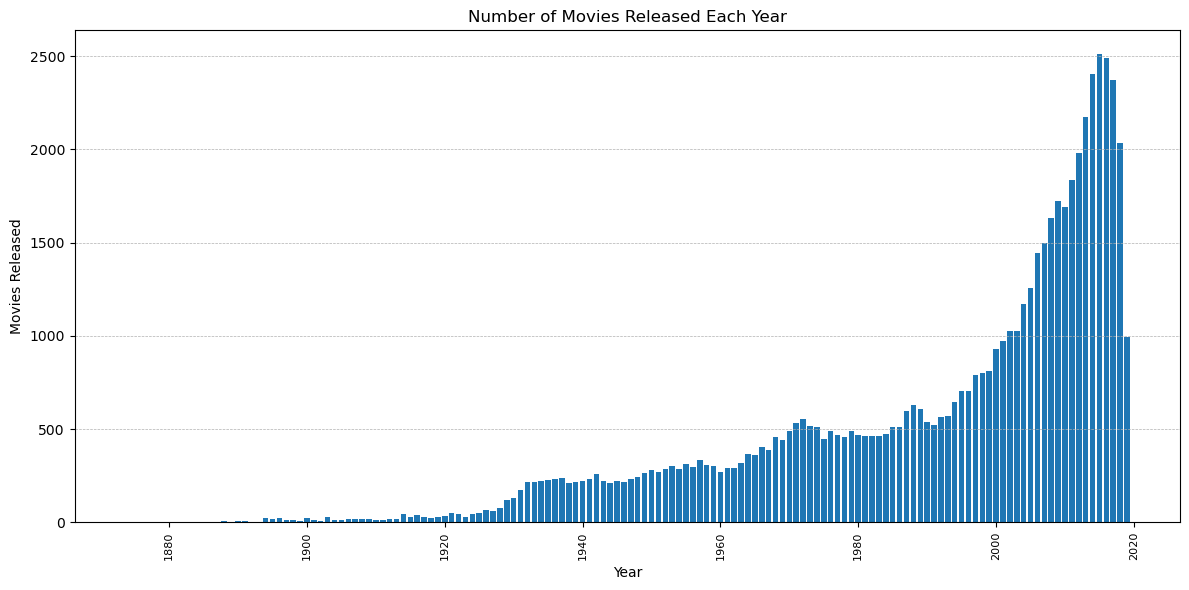

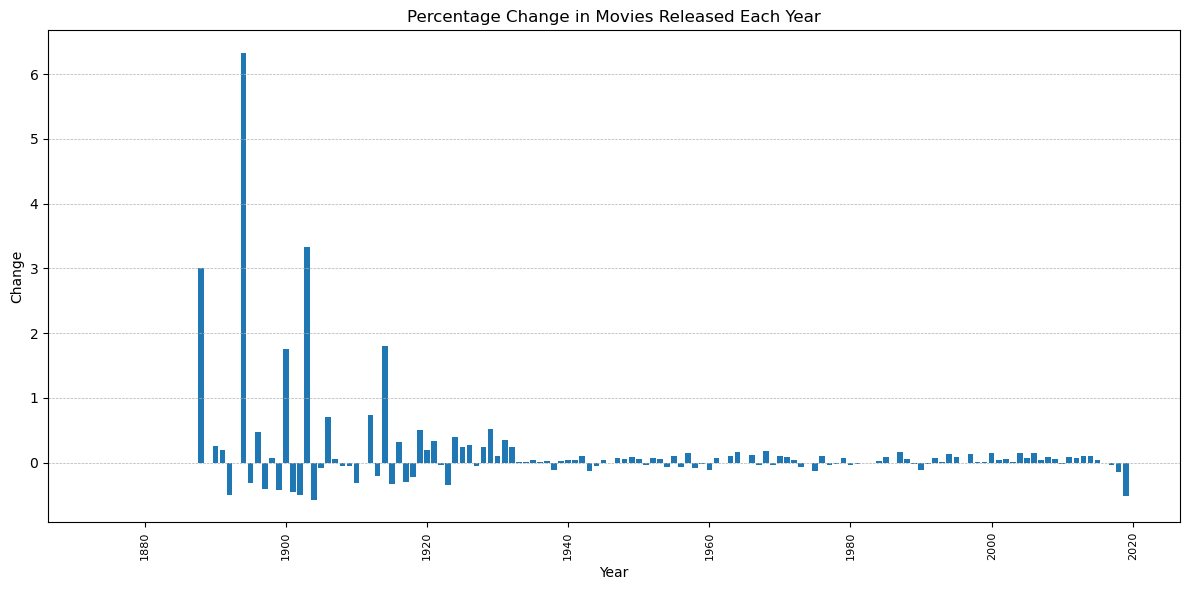

2. Most popular genre of movies:



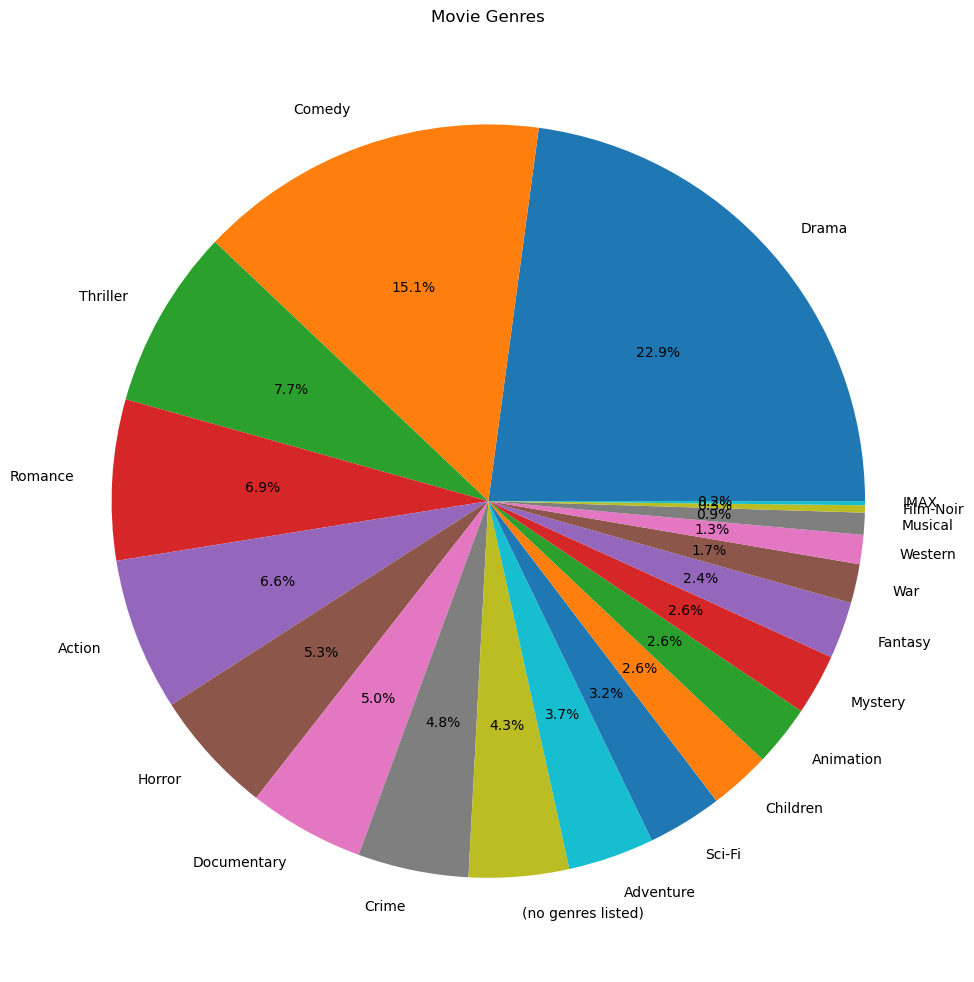

3. Highest Rated Movie per Year:

       release_year                               title              genres  \
33884        1874.0             Passage de Venus (1874)         Documentary   
33881        1878.0   Sallie Gardner at a Gallop (1878)  (no genres listed)   
56644        1880.0      Athlete Swinging a Pick (1880)         Documentary   
41138        1883.0              Buffalo Running (1883)  (no genres listed)   
33877        1887.0  Man Walking Around a Corner (1887)  (no genres listed)   
...             ...                                 ...                 ...   
29499        2015.0                     What Now (2015)              Comedy   
39493        2016.0              Sole Proprietor (2016)  Action|Crime|Drama   
42883        2017.0            Dear Diary I Died (2017)               Drama   
49041        2018.0                   Relentless (2018)            Thriller   
55913        2019.0                   The Flower (2019)       Drama|Fantasy   

         rating  

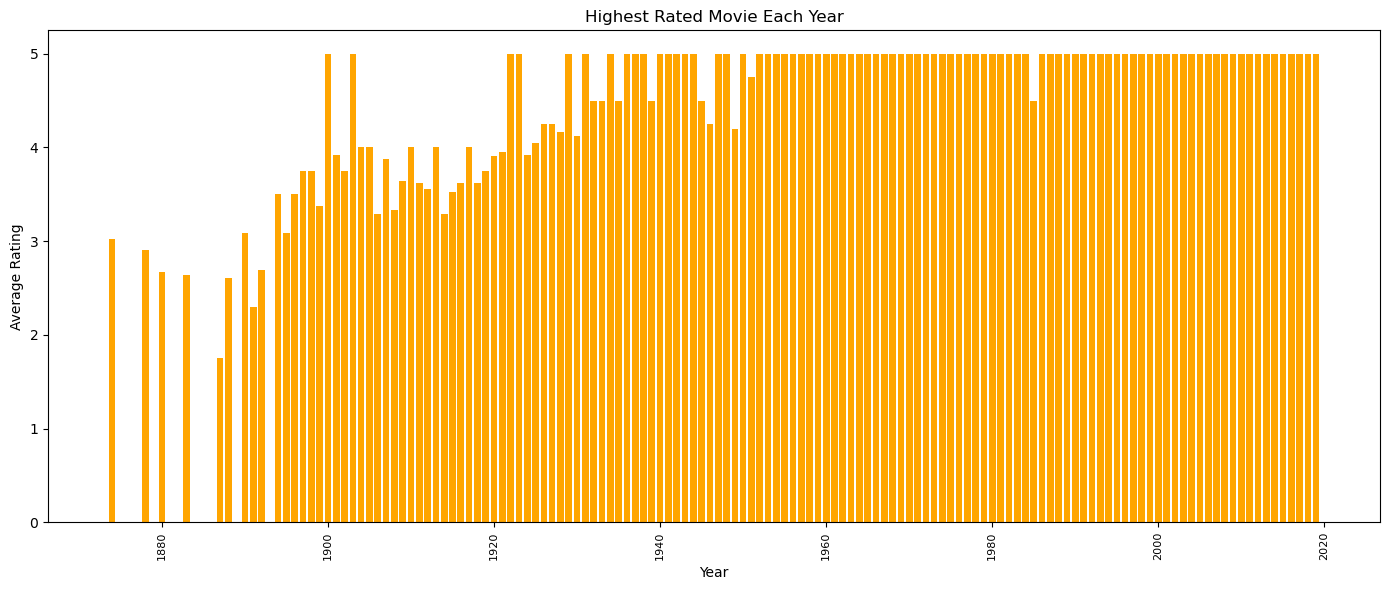

4. Top 20 High-Rated Movies with top amount of users rating and has the highest rate:

                                                title      mean  count
0                              Planet Earth II (2016)  4.483096   1124
1                                 Planet Earth (2006)  4.464797   1747
2                    Shawshank Redemption, The (1994)  4.413576  81482
3                             Band of Brothers (2001)  4.398599   1356
4                               Godfather, The (1972)  4.324336  52498
5                          Usual Suspects, The (1995)  4.284353  55366
6                      Godfather: Part II, The (1974)  4.261759  34188
7         Seven Samurai (Shichinin no samurai) (1954)  4.254769  13367
8                             Schindler's List (1993)  4.247579  60411
9                                 12 Angry Men (1957)  4.243014  16569
10                                 Rear Window (1954)  4.237948  20162
11                                  Fight Club (1999)  4.2283

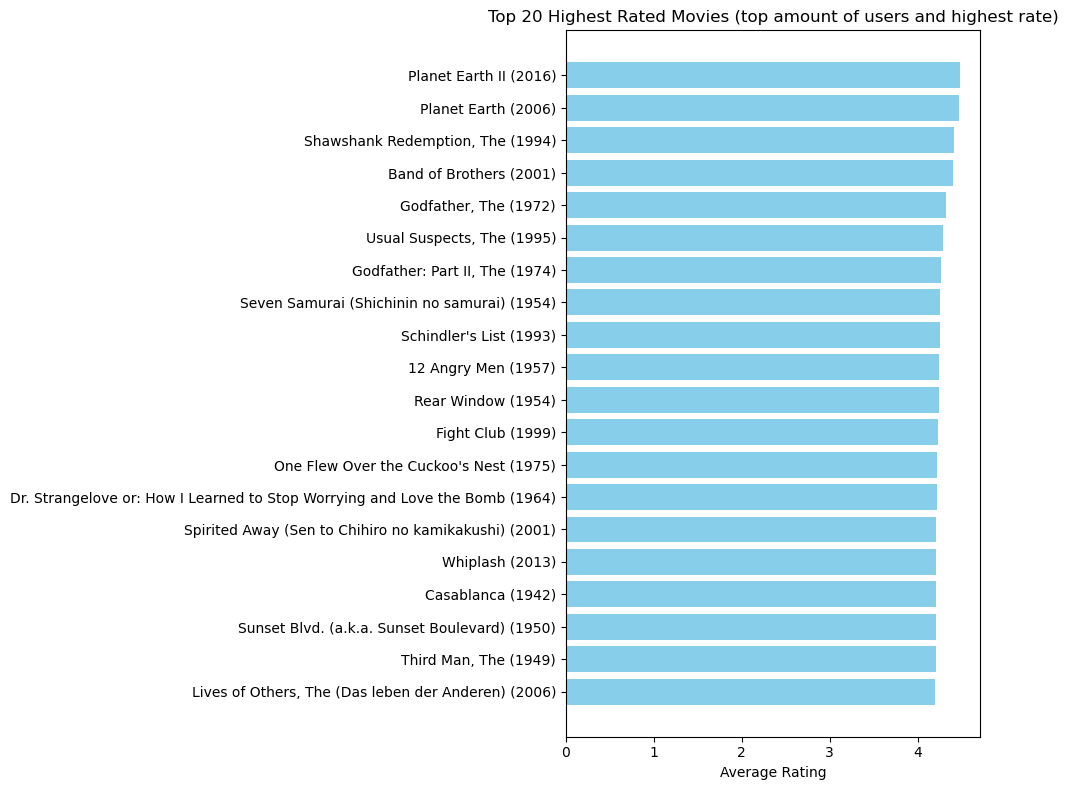

5. Most popular season for releasing movies:

release_year
2015    2513
2016    2488
2014    2406
2017    2374
2013    2173
2018    2034
2012    1978
2011    1838
2009    1724
2010    1691
2008    1632
2007    1498
2006    1446
2005    1255
2004    1172
2003    1028
2002    1024
2019     994
2001     971
2000     929
dtype: int64


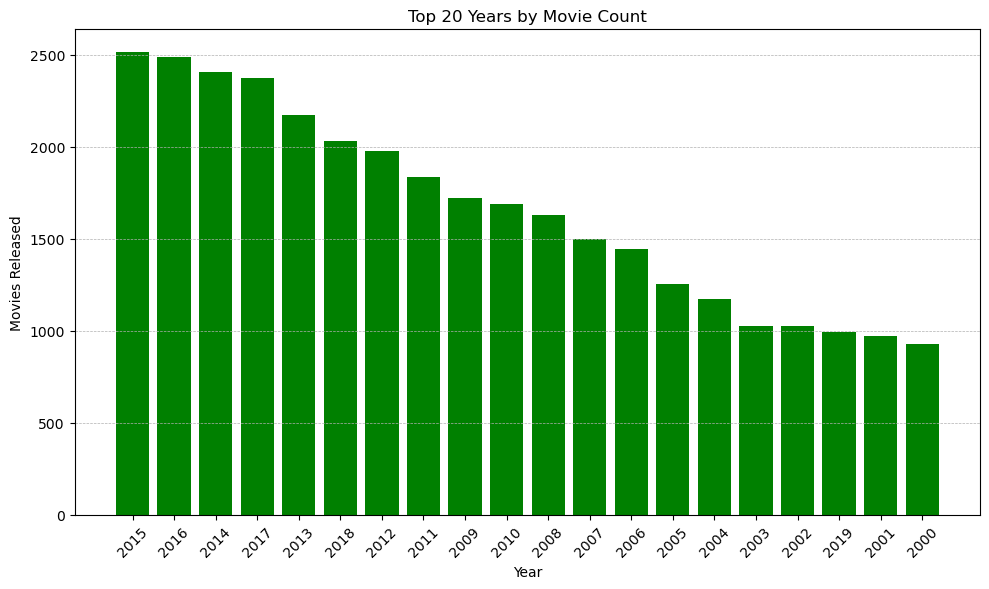

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

movies_df = pd.read_csv(r'C:\Users\Aila Shean\Documents\AILA FEU\PYTHON\Movielens 25M Dataset\movies.csv')
ratings_df = pd.read_csv(r'C:\Users\Aila Shean\Documents\AILA FEU\PYTHON\Movielens 25M Dataset\ratings.csv')

movies_df['release_year'] = movies_df['title'].str.extract(r"\((\d{4})\)")
movies_df = movies_df.dropna(subset=['release_year'])
movies_df['release_year'] = movies_df['release_year'].astype(int)

# 1. How many movies are released each year? What is the percentage of change over time?
movies_year = movies_df.groupby('release_year').size()
percentage_change = movies_year.pct_change().fillna(0)

movies_year_table = pd.DataFrame({
    'Year': movies_year.index,
    'Movies Released': movies_year.values,
    'Percent Change': (percentage_change * 100).round(2)
})
print("1. Number of movies released each year with percentage of change over time:\n")
print(movies_year_table)

plt.figure(figsize=(12, 6))
plt.bar(movies_year.index, movies_year.values)
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Movies Released')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(percentage_change.index, percentage_change.values)
plt.title('Percentage Change in Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Change')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# 2. What are the most popular genre of movies?
print("2. Most popular genre of movies:\n")
genres_split = movies_df['genres'].str.split('|', expand=True).stack()
genre_counts = genres_split.value_counts()

plt.figure(figsize=(10, 10))
plt.pie(genre_counts, labels=genre_counts.index, autopct="%.1f%%", labeldistance=1.1)
plt.title('Movie Genres')
plt.tight_layout()
plt.show()

# 3. Does the taste of movies changes over time?
avg_rating = ratings_df.groupby('movieId')['rating'].mean()
rating_with_titles = pd.merge(avg_rating, movies_df, on='movieId', how='left')

highest_per_year = rating_with_titles.loc[
    rating_with_titles.groupby('release_year')['rating'].idxmax()
]

print("3. Highest Rated Movie per Year:\n")
print(highest_per_year[['release_year', 'title', 'genres', 'rating']])

plt.figure(figsize=(14, 6))
plt.bar(highest_per_year['release_year'], highest_per_year['rating'], color='orange')
plt.title('Highest Rated Movie Each Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

# 4. What are the top 20 movies that has the top amount of users rating and has the highest rate?
rating_stats = ratings_df.groupby('movieId')['rating'].agg(['mean', 'count'])
popular = rating_stats[rating_stats['count'] >= 1000].sort_values(by='mean', ascending=False).head(20)
popular = pd.merge(popular, movies_df, on='movieId')

print("4. Top 20 High-Rated Movies with top amount of users rating and has the highest rate:\n")
print(popular[['title', 'mean', 'count']])

plt.figure(figsize=(10, 8))
plt.barh(popular['title'], popular['mean'], color='skyblue')
plt.title('Top 20 Highest Rated Movies (top amount of users and highest rate)')
plt.xlabel('Average Rating')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 5. What is the most of popular season for releasing movies?
top_20_years = movies_year.sort_values(ascending=False).head(20)

print("5. Most popular season for releasing movies:\n")
print(top_20_years)

plt.figure(figsize=(10, 6))
plt.bar(top_20_years.index.astype(str), top_20_years.values, color='green')
plt.title('Top 20 Years by Movie Count')
plt.xlabel('Year')
plt.ylabel('Movies Released')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
